In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from PIL import Image
from random import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [2]:
images=[]
labels=[]

# Loading data
we read the facial images from directory and converted into files and retrieve the particular image path 

In [3]:
paths = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(paths)
size = len(files)
print("Total samples:",size)
print(files[0])
for image in os.listdir(paths):
    path = paths+image
    gender = path.split('/')[-1].split('_')[1]
    face = imageio.imread(path)
    face = cv2.resize(face, (85, 85))
    images.append(face)
    labels.append(int(gender))

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg


Here displays the size of the images and image labels

In [4]:
print("X : ", len(images))
print("Y : ", len(labels))

X :  23708
Y :  23708


# conversion of image to array

In [5]:
#conveting images to array
X = np.array(images)
Y = np.array(labels)
X = X.astype('float32')


In [6]:
X[0].shape


(85, 85, 3)

In [7]:
X_data = np.squeeze(X)
X_data.shape


(23708, 85, 85, 3)

In [8]:
X_data /= 255
Y_data = to_categorical(Y, num_classes=2)



# Training and Testing the data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)
print(X_train.shape)
print(y_train.shape)


(18966, 85, 85, 3)
(18966, 2)


In [10]:
print(X_test.shape)
print(y_test.shape)


(4742, 85, 85, 3)
(4742, 2)


# Model development

In [11]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(85, 85, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       7

In [12]:
history=model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=64,epochs=15,validation_data=(X_test, y_test),)


Epoch 1/15
297/297 [==============================] - 43s 140ms/step - loss: 0.5251 - accuracy: 0.7246 - val_loss: 0.3935 - val_accuracy: 0.8144
Epoch 2/15
297/297 [==============================] - 42s 141ms/step - loss: 0.3309 - accuracy: 0.8532 - val_loss: 0.2899 - val_accuracy: 0.8707
Epoch 3/15
297/297 [==============================] - 41s 138ms/step - loss: 0.2881 - accuracy: 0.8708 - val_loss: 0.2783 - val_accuracy: 0.8771
Epoch 4/15
297/297 [==============================] - 41s 138ms/step - loss: 0.2563 - accuracy: 0.8882 - val_loss: 0.2624 - val_accuracy: 0.8891
Epoch 5/15
297/297 [==============================] - 42s 140ms/step - loss: 0.2374 - accuracy: 0.8972 - val_loss: 0.3084 - val_accuracy: 0.8747
Epoch 6/15
297/297 [==============================] - 41s 138ms/step - loss: 0.2260 - accuracy: 0.9022 - val_loss: 0.2591 - val_accuracy: 0.8908
Epoch 7/15
297/297 [==============================] - 41s 139ms/step - loss: 0.2101 - accuracy: 0.9106 - val_loss: 0.2429 - val_ac

In [13]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

  


 Test accuracy: 0.905103325843811


In [14]:
labels =["Male","Female"]

# Visualize the errors and identify actual label vs predicted labels
Here display the output if predicted correctly represent by green colour and other wise represent by red colour

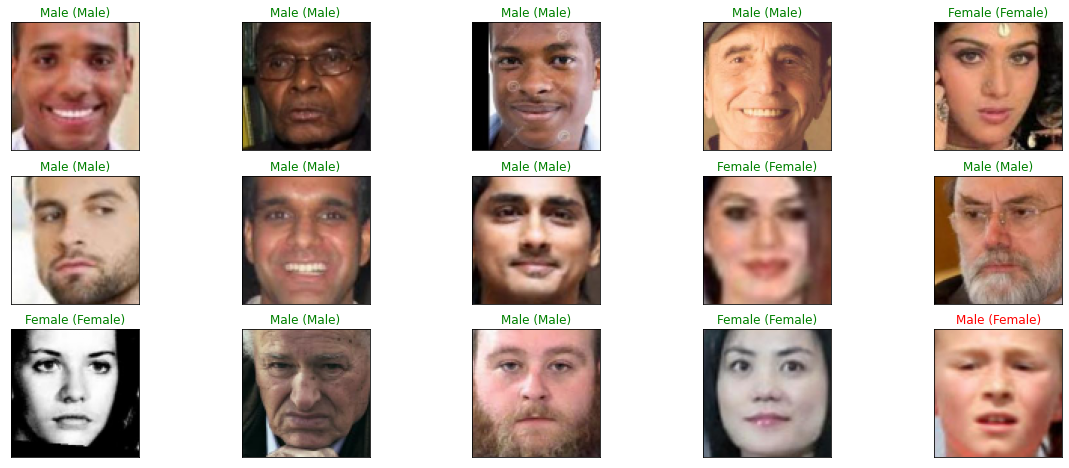

In [15]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()